In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'data/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
top_artists=df['artists'].value_counts().head(20)
top_artists

artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
Name: count, dtype: int64

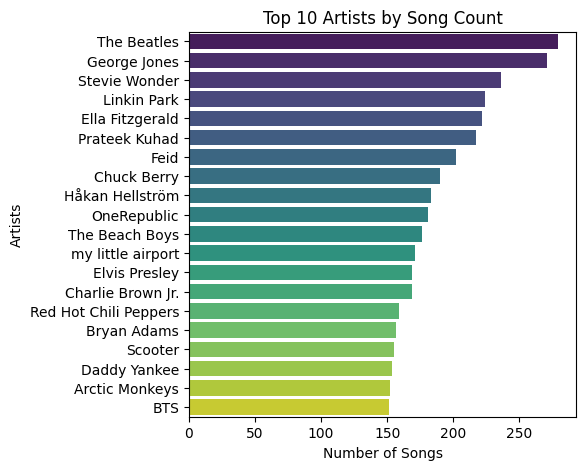

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index,palette="viridis",legend=False)
plt.title("Top 10 Artists by Song Count")
plt.xlabel("Number of Songs")
plt.ylabel("Artists")
plt.show()

In [8]:
df.groupby('artists')['popularity'].mean()

artists
!nvite                                                23.000000
"Puppy Dog Pals" Cast                                 57.500000
"Weird Al" Yankovic                                   26.333333
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs    34.000000
$affie                                                39.000000
                                                        ...    
黃仲崑                                                   24.333333
黃妃                                                    24.000000
黃小琥                                                   56.000000
黃敏華                                                   20.000000
龍藏Ryuzo                                               21.500000
Name: popularity, Length: 31437, dtype: float64

In [9]:
top_artists_popularity=df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
top_artists_popularity

artists
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         94.5
Joji                            94.0
Beyoncé                         93.0
Rema;Selena Gomez               92.0
Harry Styles                    92.0
Rauw Alejandro;Lyanno;Brray     91.0
Name: popularity, dtype: float64

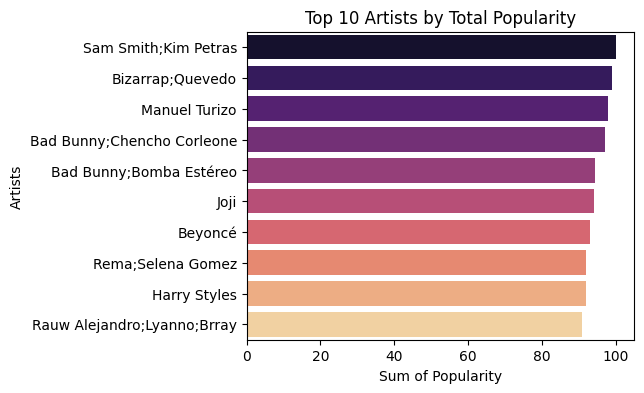

In [15]:
plt.figure(figsize=(5,4))
sns.barplot(
    x=top_artists_popularity.values,
    y=top_artists_popularity.index,
    hue=top_artists_popularity.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Top 10 Artists by Total Popularity")
plt.xlabel("Sum of Popularity")
plt.ylabel("Artists")
plt.show()

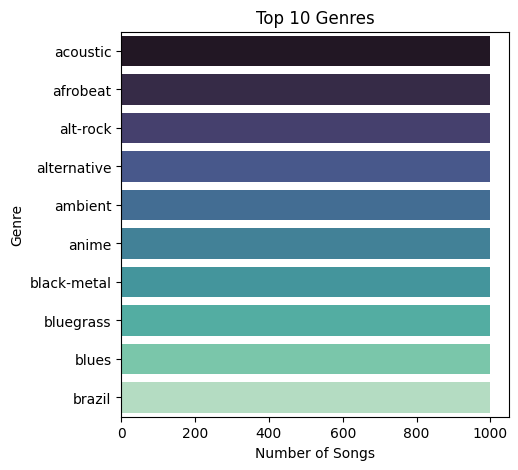

In [21]:
top_genres = df['track_genre'].value_counts().head(10)

plt.figure(figsize=(5,5))
sns.barplot(x=top_genres.values, y=top_genres.index,hue=top_genres.index,palette="mako",legend=False)
plt.title("Top 10 Genres")
plt.xlabel("Number of Songs")
plt.ylabel("Genre")
plt.show()


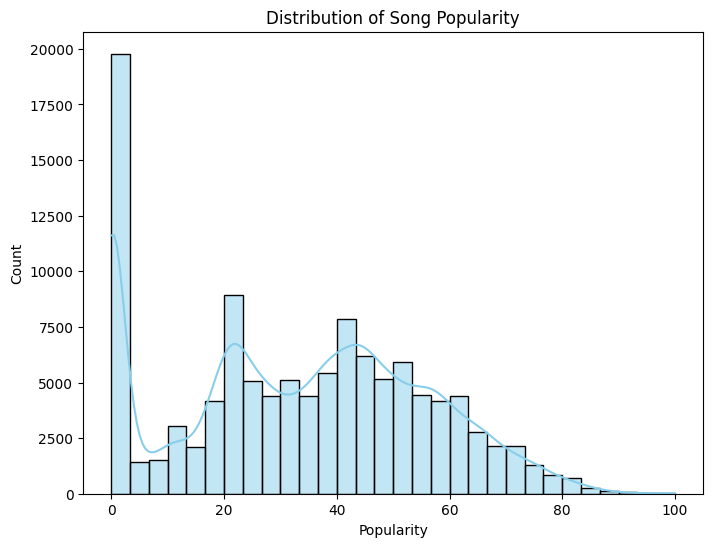

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(df['popularity'], bins=30, kde=True, color="skyblue",line_kws={'color':'blue'})
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


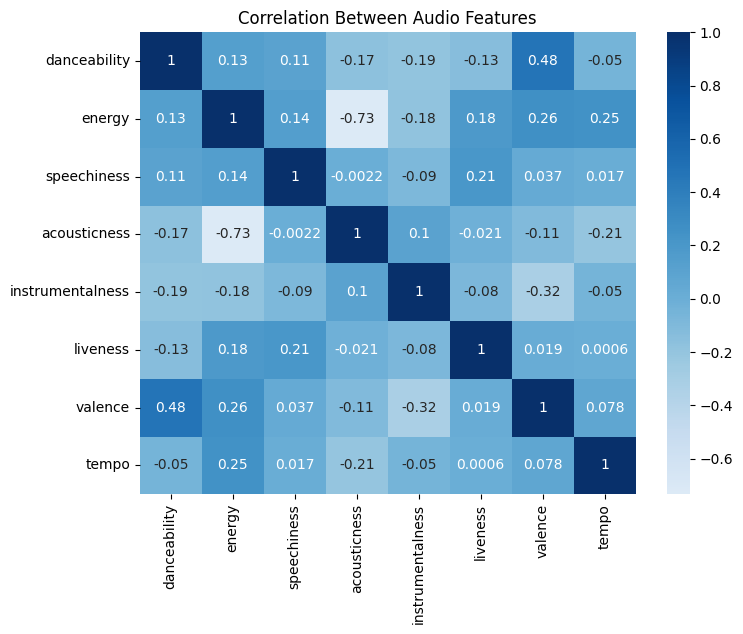

In [34]:
features = [
    'danceability', 'energy', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="Blues", center=0)
plt.title("Correlation Between Audio Features")
plt.show()


In [39]:
import pandas as pd

df = pd.read_csv("data/dataset.csv")
features = ['danceability', 'energy', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

corr_matrix = df[features].corr()
corr_matrix.to_csv("data/corr_matrix.csv")